<h1>Deep Neural Networks for MNIST Classification</h1>

Load Tensorflow

In [1]:
#Import Tensorflow
import tensorflow as tf
tf.random.set_seed(42)

Collect Data

We will use MNIST dataset for this exercise. This dataset contains images of hand written numbers with each image being a black & white picture of size 28x28. We will download the data using tensorflow API. The dataset has 60,000 training examples and 10,000 test examples. Please note that images have already been converted to numpy arrays.


In [2]:
#Download dataset
(trainX, trainY),(testX, testY) = tf.keras.datasets.mnist.load_data()

In [3]:
#Check number of training examples and size of each example
trainX.shape

(60000, 28, 28)

In [4]:
testX.shape

(10000, 28, 28)

Visualize the data

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#function to display test image
def show_random_test_image():
  #Get a random integer between 0 and number of test examples
  img_num = np.random.randint(0, testX.shape[0])
  #SHOW THE IMAGE from test dataset
  plt.imshow(testX[img_num],cmap='gray')
  plt.suptitle('Number: '+ str(testY[img_num]))
  plt.show()

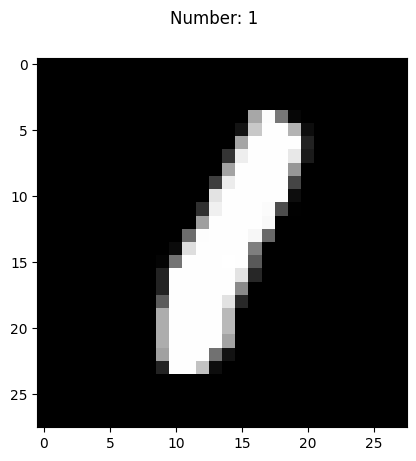

In [7]:
#Run the function multiple times to look at different test images
show_random_test_image()

<h1>Convert Output label to probabilities

As our model will predict 10 probabilities (probability of 0, 1, 2...9) for each image, we need to have 10 actual probabilities (probabilities of 0,1,2,...9). Here we convert our single number label to 10 actual probabilities using One hot encoding. In one hot encoding, a number gets represented by multiple numbers e.g. number_classes (10 in this example). Out of 10 numbers in One hot encoding, 9 will have value of '0' whereas number will have value of 1.

In [8]:
#Now check the label after conversion to 10 numbers
testY[0]

7

In [9]:
#Convert single number labels to 10 numbers using One hot encoding. In Keras API, 
#we can use 'to_categorical' method to do the same. We are converting both test 
#and training labels.

trainY= tf.keras.utils.to_categorical(trainY, num_classes= 10)
testY = tf.keras.utils.to_categorical(testY, num_classes= 10)

In [10]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

For our first test image (which has 7 as indicated above), we now have 10 labels or 10 probabilities. First number is probability for picture having number '0' in it, 2nd number is probability if picture having number '1' in it and so on. Here all the probabilities are 0% except for probability being 100% for number 7.

<h1>Build the Model(Graph)</h1>

In [11]:
#Initialize the Sequential Model
model = tf.keras.models.Sequential()

**Reshape data** from 2D to 1D -> 28x28 to 784. This is needed as Dense layer requires each example to be 1D i.e a Vector. Also note that our input data shape is (28,28) for MNIST.

In [12]:
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

**Normalize the data** : From now on, we will add a layer to normalize our data inside the model (as normalization is also a math function). We can use BatchNormalization layer to do the same. This means, we need not save our normalizer object using pickle separately.

In [13]:
model.add(tf.keras.layers.BatchNormalization())

**Add hidden layers**: We will build a model with 4 hidden layers. Number of neurons in hidden layer will be 200, 100, 60 and 30 respectively. Both number of hidden layers and number of neurons in each hidden layer are hyperparameters i.e you can change these values to improve the model. Output of each neuron in hidden layer will be passed through an activation function.

In [14]:
#Add 1st Hidden layer
model.add(tf.keras.layers.Dense(200, activation='sigmoid'))

In [15]:
#Add 2nd Hidden Layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [16]:
#Add 3rd Hidden Layer
model.add(tf.keras.layers.Dense(60, activation='sigmoid'))

In [17]:
#Add 4th Hidden Layer
model.add(tf.keras.layers.Dense(30, activation='sigmoid'))

**Add Output layer**: Dense Layer to create **10 equations** which provides 10 outputs after applying softmax.

In [18]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))

**Compile** the model. We will use non-default learning rate (which is usually set to 0.01 in Keras) for our model. So first we will create an optimizer object and specify the learning rate.




In [19]:
#Create optimizer with learning rate of 0.03
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.03)

In [20]:
from keras.losses import categorical_crossentropy
model.compile(optimizer = sgd_optimizer,
              loss= categorical_crossentropy,
              metrics=['accuracy'])

Train the Model

In [21]:
model.fit(trainX,trainY, #Training data - Features and One hot encoded labels         
          validation_data=(testX,testY), #Test data
          epochs=50, #Number of iterations
          batch_size= 32) #Here we train model with 32 examples at a time. You can change this number to see if model accuracy improves.

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2977 - accuracy: 0.1317 - val_loss: 2.2809 - val_accuracy: 0.1028
Epoch 2/50
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1490 - accuracy: 0.2789 - val_loss: 1.8000 - val_accuracy: 0.4336
Epoch 3/50
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3651 - accuracy: 0.5596 - val_loss: 1.0026 - val_accuracy: 0.6966
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8806 - accuracy: 0.7210 - val_loss: 0.7172 - val_accuracy: 0.7844
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6817 - accuracy: 0.8000 - val_loss: 0.5471 - val_accuracy: 0.8546
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5416 - accuracy: 0.8482 - val_loss: 0.4548 - val_accuracy: 0.8718
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4515 - accuracy: 0.8744 - val_loss: 0.3809 - val_accuracy:

Save the Model

In [22]:
from Notebook.DSNotebook.NotebookExecutor import NotebookExecutor
nb = NotebookExecutor()
saved_model = nb.save_model(model = model, modelName = 'dnn_mnist', modelType = 'cv', X = None, y = None, estimator_type='')
#X and y are training datasets to get explainer dashboard.
#estimator_type is to specify algorithm type i.e., classification and regression.
#Only 'ml’ models with tabular data as input will support in Explainer Dashboard.
#Choose modelType = 'ml' for machine learning models, modelType = 'cv' for computer vision models and modelType = 'dp' for data transformation pickle files. 
#Provide ‘column_headers’ as a parameter if they have to be saved in the model.
#If using custom layer in keras, use native save functionality from keras.

WARN: Training data is not provided. Unable to generate Explainer Dashboard


## Model Prediction

Prediction on Test Image

It tells us model can take any number of examples as in put ('None' in shape) and each example should have 28x28 shape (2D).

In [23]:
#Shape of each example in test dataset
testX[0].shape

(28, 28)

In [24]:
#Make it 3 dimension shape i.e make it (1,28,28). This will mean one example with that example having a shape of 28x28
input_data = np.expand_dims(testX[0], axis=0)
input_data.shape

(1, 28, 28)

Model Prediction

In [25]:
#Model prediction
pred = model.predict(input_data)
pred

1/1 [==============================] - 0s 69ms/step


array([[4.7220348e-07, 6.0343905e-06, 4.1634571e-06, 9.1774171e-05,
        1.5720165e-08, 5.4023456e-08, 3.3719238e-12, 9.9971122e-01,
        5.5240697e-08, 1.8621465e-04]], dtype=float32)

In [26]:
#Model prediction shape
pred.shape

(1, 10)

In [27]:
#Model prediction for first example
pred[0]

array([4.7220348e-07, 6.0343905e-06, 4.1634571e-06, 9.1774171e-05,
       1.5720165e-08, 5.4023456e-08, 3.3719238e-12, 9.9971122e-01,
       5.5240697e-08, 1.8621465e-04], dtype=float32)

Find the number for which probability is highest using 'argmax' function

In [28]:
#This gives us predicted label
np.argmax(pred[0])

7

In [29]:
#Actual label
np.argmax(testY[0])

7

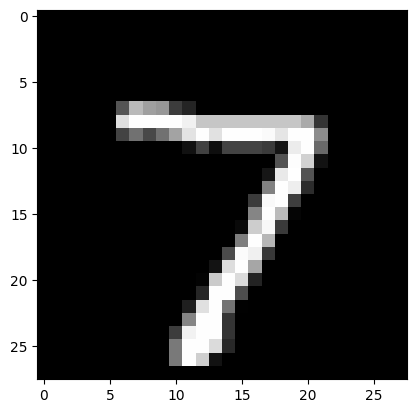

In [30]:
#Lets visualize the image as well
import matplotlib.pyplot as plt
plt.imshow(testX[0],cmap='gray')
plt.show()